# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase (or decrease).


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [1]:
# H_0 = the probability of sucess for the new email template is <0.05

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [2]:
# H_1 = the probability of sucess for the new email template is >=0.06

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [7]:
import numpy as np 

In [3]:
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [6]:
power_analysis = TTestIndPower()
#effect size = mean difference / std deviation
eff_size = 0.01/0.0475
#choose one-side test with 'alternative' parameter
power_analysis.solve_power(effect_size=eff_size, alpha=0.05, power=0.8, alternative='larger')

279.6667468021841

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

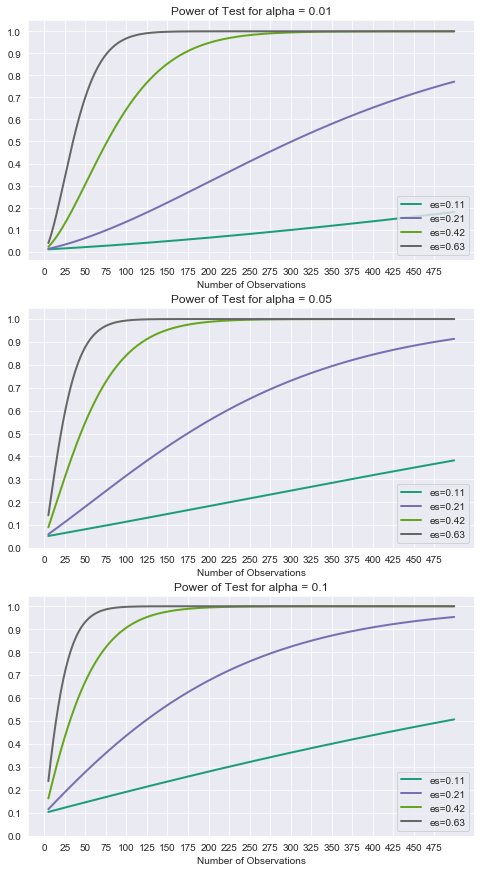

In [11]:
sd = 0.0475
ef_sizes = [mu/sd for mu in [0.005, 0.01, 0.02, 0.03]]
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(8,15))
for n, alpha in enumerate([0.01, 0.05, 0.1]):
    ax = axes[n]
    power_analysis.plot_power(dep_var="nobs",
                              nobs = np.array(range(5,500)),
                              effect_size=ef_sizes,
                              alpha=alpha,
                              ax=ax)
    ax.set_title('Power of Test for alpha = {}'.format(alpha))
    ax.set_xticks(list(range(0,500,25)))
    ax.set_yticks(np.linspace(0,1,11))

## Step 5: Propose a Final Experimental Design
Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

In [12]:
#It seems that a minimum sample size 100, 
#to detect all but the largest effect sizes with a reasonable balance of alpha and power. 
#After the initial roll-out, there should be sufficient evidence to determine whether 
#further investigation is warranted

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.